In [48]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import timeit

# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:center;padding: 0px; border-bottom: 0px solid #CBE4DE">Performance Comparison of Heap Sort, Quick Sort, and Merge Sort Algorithms</p>

<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:center;padding: 0px; border-bottom: 0px solid #CBE4DE">Brandon Smith, Deakin University</p>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">Table of Contents</p>
<ul>
    <li><a href="#introduction">1 Introduction</a>
    <li><a href="#heapsort">2 Heap Sort</a></li>
    <ul>
            <li><a href="#heapsort1">2.1 Heap Sort Algorithm</a></li>
            <li><a href="#heapsort2">2.2 Heap Sort Algorithm Analysis</a></li>
        </ul>
    <li><a href="#quicksort">3 Quick Sort</a></li>
    <ul>
            <li><a href="#quicksort1">3.1 Quick Sort Algorithm</a></li>
            <li><a href="#quicksort2">3.2 Quick Sort Algorithm Analysis</a></li>    
        </ul>
    <li><a href="#mergesort">4 Merge Sort</a></li>
    <ul>
            <li><a href="#mergesort1">4.1 Recursive Merge Sort Algorithm</a></li>
            <li><a href="#mergesort2">4.2 Iterative Merge Sort Algorithm</a></li>
            <li><a href="#mergesort3">4.3 Merge Sort Algorithm Analysis</a></li>
        </ul>
    <li><a href="#conclusion">5 Comparisons Between Algorithms</a></li>
    <li><a href="#finalconclusion">6 Final Conclusion</a></li>
    <li><a href="#summary">7 References</a></li>
</ul>

# <p id="introduction" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">1 Introduction</p>

We will be researching three algorithms for sorting data: **(1) Heap Sort**, **(2) Quick Sort**, and **(3) Merge Sort**.

In <a href="#1">[1]</a>, the time complexities of these algorithms are provided. Each algorithm has an average case time complexity of Θ(n log n), which is a desirable property for sorting algorithms as it provides good performance on average, even for large input sizes.

<table>
  <tr>
    <th>Algorithm</th>
    <th>Worst-case running time</th>
    <th>Average-case/expected running time</th>
  </tr>
  <tr>
    <td>Merge sort</td>
    <td>&Theta;(n log n)</td>
    <td>&mdash;</td>
  </tr>
  <tr>
    <td>Heapsort</td>
    <td>&Theta;(n log n)</td>
    <td>&Theta;(n log n)</td>
  </tr>
  <tr>
    <td>Quicksort</td>
    <td>&Theta;(n<sup>2</sup>)</td>
    <td>&Theta;(n log n) (expected)</td>
  </tr>
</table>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Complexity</p>

In order to determine the fastest sorting algorithm among the proposed three, we must first understand what time complexity means. The requirements of the task specify that the chosen algorithms should have an average time complexity of Θ(n log n), and in our case, all three algorithms meet this requirement.

There are three types of time complexities discussed in <a href="#5">[5]</a>:

- **Best case** - This represents the optimal running time an algorithm can achieve when the inputs are as favorable as possible <a href="#5">[5]</a>. In this situation, the algorithm performs at its highest efficiency.


- **Average case** - The average-case complexity of an algorithm refers to the time utilised by the algorithm, averaged across all potential inputs <a href="#6">[6]</a>. This metric provides a more comprehensive view of the algorithm's performance in typical situations.


- **Worst case** - This scenario measures the resources (e.g., running time, memory) an algorithm requires for an input of arbitrary size. The worst-case complexity highlights the upper bound on an algorithm's performance, helping to identify potential bottlenecks or inefficiencies when dealing with large inputs <a href="#7">[7]</a>. 

<p style="text-align:center; font-weight:bold;">The most common examples of Big O are listed in the following table.<a href="#5">[5]</a></p>

<br>

<table>
  <thead>
    <tr>
      <th>Notation</th>
      <th style="text-align:left">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>$$O(1)$$</td>
      <td style="text-align:left">Constant running time.</td>
    </tr>
    <tr>
      <td>$$O(\log n)$$</td>
      <td style="text-align:left">Logarithmic running time.</td>
    </tr>
    <tr>
      <td>$$O(n)$$</td>
      <td style="text-align:left">Linear running time.</td>
    </tr>
    <tr>
      <td>$$O(n\log\ n)$$</td>
      <td style="text-align:left">Log-linear running time.</td>
    </tr>
    <tr>
      <td>$$O(n^k)$$</td>
      <td style="text-align:left">Polynomial running time.</td>
    </tr>
    <tr>
      <td>$$O(c^n)$$</td>
      <td style="text-align:left">Exponential running time.</td>
    </tr>
  </tbody>
</table>

<br>

I provide more in-depth information regarding the types of complexities in my <a href="https://github.com/brandonsmith301/research-notebooks/blob/main/Understanding%20Complexity%20by%20Brandon%20Smith.ipynb">Understanding Complexity</a> notebook, which references multiple sources which I have retrieved my information from.

# <p id="heapsort" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">2 Heap Sort</p>

Heap sort is a sorting technique that strikes a balance between the advantages of merge sort, which we will discuss later, and insertion sort (which we won't cover). In simpler terms, it's fast like merge sort and doesn't require extra storage space like insertion sort <a href="#1">[1]</a>. 

Now in order to understand heap sort, we need to understand the heaps data structure. In <a href="#2">[2]</a>, they explain that a binary heap is a special kind of tree structure where each parent node is either greater than or equal to its children. There are two types of which they discuss which are max-heap and min-heap. In a max-heap, the highest value is at the root, while in a min-heap, the lowest value is at the root.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Implementing Max-Heap</p>

The function <code>max_heapify</code> ensures that the subtree rooted at index $i$ of array $A$ satisfies the max-heap property, meaning that each parent node is greater than or equal to its children <a href="#2">[2]</a>. 

It first finds the indices of the left and right children of the node at index $i$. Then, it checks if either child is greater than the current node. If so, it swaps the current node with the larger child and recursively calls <code>max_heapify</code> on the swapped index to enforce the max-heap property on the subtree rooted at the swapped index.

In [49]:
def max_heapify(A, i, heap_size):
    left = 2 * i + 1
    right = 2 * i + 2
    largest = i

    if left < heap_size and A[left] > A[largest]:
        largest = left

    if right < heap_size and A[right] > A[largest]:
        largest = right

    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        max_heapify(A, largest, heap_size)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Implementing Min-Heap</p>

Similar to <code>max_heapify</code> but enforces the min-heap property, meaning that each parent node is less than or equal to its children <a href="#2">[2]</a>. It also starts by finding the indices of the left and right children of the node at index $i$. It then checks if either child is smaller than the current node. If so, it swaps the current node with the smaller child and recursively calls <code>min_heapify</code> on the swapped index to enforce the min-heap property on the subtree rooted at the swapped index.

In [50]:
def min_heapify(A, i, heap_size):
    left = 2 * i + 1
    right = 2 * i + 2
    smallest = i

    if left < heap_size and A[left] < A[smallest]:
        smallest = left

    if right < heap_size and A[right] < A[smallest]:
        smallest = right

    if smallest != i:
        A[i], A[smallest] = A[smallest], A[i]
        min_heapify(A, smallest, heap_size)

# <p id="heapsort1" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">2.1 Heap Sort Algorithm</p>

Before applying heap sort, the list must be converted into a max-heap, which involves understanding the heap data structure (provided above). The algorithm then repeatedly swaps the first and last elements of the list, reducing the heap's range by one, and inserting the new value into its correct position in the heap, as outlined in the reference <a href="#8">[8]</a>.

The implementation of heap sort utilises three functions:
1. `build_max_heap`
2. `max_heapify`
3. `heap_sort`

The `heap_sort` function sorts an unsorted list in ascending order by first building a max heap from the list using the build_max_heap function, and then repeatedly swapping the root node with the last node of the heap, and then re-heapifying the remaining nodes using the `max_heapify` function until the entire list is sorted.

By following the steps outlined in the reference <a href="#8">[8]</a> (which also provides the pseudocode), we can break down the process using Python code.

In [51]:
def build_max_heap(lst):
    """Transforms a list into a max heap"""
    # Start from the middle of the list and 
    # heapify each subtree in reverse level order
    for i in range(len(lst) // 2 - 1, -1, -1):
        max_heapify(lst, index=i, size=len(lst))

def max_heapify(lst, index, size):
    """Maintains the max heap property for a given subtree"""
    # Get the left and right children of the current node
    left = 2 * index + 1
    right = 2 * index + 2

    # Find the largest element among the node and its children  
    largest = index
    if left < size and lst[left] > lst[largest]:
        largest = left
    if right < size and lst[right] > lst[largest]:
        largest = right

    # If the largest element is not the current node, 
    # swap it with the largest child and
    # recursively call max_heapify on the 
    # affected subtree
    if largest != index:
        lst[index], lst[largest] = lst[largest], lst[index]
        max_heapify(lst, largest, size)
        
def heap_sort(lst):
    # First, we build a max heap from the list.
    # the function is provided after this function
    build_max_heap(lst)
    
    # Now we perform the heap sort by swapping the 
    # root node with the last node, then removing the 
    # last node from the heap and placing it at the 
    # end of the list.
    
    for i in range(len(lst) - 1, 0, -1):
        lst[0], lst[i] = lst[i], lst[0]  # swap root node with last node
        max_heapify(lst, index=0, size=i)  # call max_heapify on the 
                                            # remaining heap    
    return lst

# <p id="heapsort2" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">2.2 Heap Sort Algorithm Analysis</p>

Now that we have covered how to implement Heap Sort in both Python and C++. I want to take the time to analyse its time complexity. In order to analyse the time complexity of this sorting algorithm we have to look at each function seperately. 

1. `max_heapify`: the time complexity of this function is $\mathcal{O}(\log n)$, where $n$ is the size of the heap. This is because the function works on a binary tree and, in the worst case, the number of levels traversed is proportional to the height of the tree, which is $\log n$ <a href="#1">[1]</a>.


2. `build_max_heap`: the time complexity of this function is $\mathcal{O}(n)$ because we need to consider that, in a heap of size $n$, only half of the nodes are leaves. Therefore, the total number of operations required to build a max heap is less than $n$ times $\mathcal{O}(\log n)$.


3. `heap_sort`: has the time complexity of is $\mathcal{O}(n \log n)$. This is because `build_max_heap` operation takes $\mathcal{O}(n)$ time, and for each of the remaining $n - 1$ elements,` max_heapify` takes $\mathcal{O}(\log n)$ time. Therefore, the total complexity of `heap_sort` is $\mathcal{O}(n + n \log n) = \mathcal{O}(n \log n)$ <a href="#1">[1]</a>.

# <p id="quicksort" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">3 Quick Sort</p>

Quick Sort is an efficient and widely used sorting algorithm that works based on the idea that an element is in a sorted position if all the elements before that element are smaller and all the elements after that are larger <a href="#3">[3]</a>. It applies the divide-and-conquer paradigm and consists of the following steps <a href="#1">[1]</a>:

1. **Divide:** First, we choose a 'pivot' element from the array. There are various strategies to select the pivot, such as choosing the first element, the last element, the median, or a random element. Once the pivot is chosen, we partition the array into two parts: elements smaller than the pivot and elements larger than the pivot. This process is called partitioning.


2. **Conquer:** After partitioning the array, we recursively apply the Quick Sort algorithm on the two sub-arrays (the smaller elements and the larger elements). The base case for the recursion is when the sub-array has only one or no elements, in which case it is already sorted.


3. **Combine:** Since the sub-arrays are sorted independently, combining them is trivial. The final sorted array is obtained by concatenating the sorted smaller elements sub-array, the pivot element, and the sorted larger elements sub-array.

One advantage of Quick Sort is that it is an in-place sorting algorithm, which means it doesn't require any additional memory to be allocated for temporary storage <a href="#1">[1]</a>. This makes it more memory-efficient compared to other sorting algorithms like Merge Sort. However, Quick Sort is not stable, meaning that the relative order of equal elements may not be preserved in the sorted array.

# <p id="quicksort1" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">3.1 Quick Sort Algorithm</p>

Like before, we will implement this in Python and then I will also provide the C++ version of this algorithm.

In [52]:
def quick_sort(lst, p, r):
    # If the starting index is less than the ending index,
    # proceed with the sorting process.
    if p < r:
        # Partition the list around the pivot and get the pivot's index.
        q = partition(lst, p, r)
        
        # Recursively apply quick_sort to the left subarray.
        quick_sort(lst, p, q-1)
        
        # Recursively apply quick_sort to the right subarray.
        quick_sort(lst, q+1, r)
        
def partition(lst, p, r):
    # Choose the pivot element, which is the last element in the list.
    x = lst[r]
    
    # Set the starting index for the partition.
    i = p - 1
    
    # Iterate through the list from the starting index to 
    # the second-last element.
    for j in range(p, r):
        # If the current element is less than or equal to the pivot,
        # swap it with the element at the next position of the partition.
        if lst[j] <= x:
            i += 1
            lst[i], lst[j] = lst[j], lst[i]
    
    # Swap the pivot with the element at the next position 
    # of the partition, effectively placing the pivot in 
    # its correct position in the sorted list.
    lst[i + 1], lst[r] = lst[r], lst[i + 1]
    
    # Return the index of the pivot element.
    return i + 1

The most important function component of the quick sort algorithm is `partition`, which reorganises a subarray in place. The process involves consistently choosing an element, such as `x = lst[r]`, as the pivot element around which the rest of the elements are rearranged. 

The purpose of this rearrangement is to separate the array into two distinct sections: one with elements smaller than or equal to the pivot and another with elements greater than the pivot.

# <p id="quicksort2" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">3.2 Quick Sort Algorithm Analysis</p>

The time complexity of the Quick Sort algorithm depends on the partitioning of the input data and the choice of the pivot element <a href="#3">[3]</a>. We can consider three different cases:

**Worst-case:** This will occur when the pivot always divides the list into unbalanced partitions (i.e. one partition has only one element and the other partition has the rest of the elements). In this case, the time complexity of quick sort is $\mathcal{O}(n^2)$, where $n$ is the number of elements in the list.

The reason being is, for each level of recursion, we have to process $n - 1$, $n - 2$, $n - 3$, ..., $1$ elements, resulting in a quadratic number of operations.

**Average-case:** This happens if thhe pivot element roughly divides the list into two equal parts. In this case, the depth of the recursion is $\log n$, and the time complexity of quick sort is $\mathcal{O}(n \log n)$.

**Best-case:** Similar to the average-case, in which the pivot always divides the list into two equal parts. This results in a balanced recursion tree with $\log n$ depth, yielding a time complexity of $\mathcal{O}(n \log n)$.

<hr>

**Note:** In practice, quick sort is often faster than other $\mathcal{O}(n \log n)$ algorithms, such as heap sort and merge sort, especially for smaller datasets or when implemented with good pivot selection strategies and optimisations <a href="#1">[1]</a>. This is particularly relevant to my research because we are sorting a small array for Task 6.3D.

# <p id="mergesort" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">4 Merge Sort</p>

Like quick sort, merge sort uses a divide-and-conquer approach to sort a list of elements. In simple words, it breaks the list into smaller sublist, sorts them, and then combines the sorted sublist to create the final sorted list <a href="#1">[1]</a>. It was invented by John von Neumann in 1945 and still widely used today.

The main insight by John von Neumann is that merging two sorted lists can be done efficiently. To do this, compare the first elements of each list and add the smaller one to the end of the resulting sorted list. Once one of the lists is empty, simply copy any remaining items from the other list to complete the sorted list <a href="#5">[5]</a>.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Merging list</p>

To understand merge sort, we need to understand the `merging` process as this is the fundamental idea of merge sort. Explained in <a href="#3">[3]</a>, given two sorted sublists, the algorithm iterates through them, comparing their elements and selecting the smaller one at each step. The chosen element is then added to a new list, resulting in a merged list that maintains the sorted order.

For example, consider the following Python code:

In [53]:
def merge(left, right):
    result = []  # Create an empty list to store the merged result
    i = 0 # Initialise two pointers i and j 
    j = 0  # to traverse the left and right lists      

    # Iterate until we reach the end of either left or right list
    while i < len(left) and j < len(right):
        # Compare the current elements in left and right lists
        if left[i] <= right[j]:
            result.append(left[i])  # Add the smaller element 
                                   # (left[i]) to the result list
            i += 1  # Move the pointer i to the next 
                    # element in the left list
        else:
            result.append(right[j])  # Add the smaller element 
                                     # (right[j]) to the result list
            j += 1  # Move the pointer j to the next element 
                    # in the right list

    # Add any remaining elements from the left and right lists
    result.extend(left[i:])
    result.extend(right[j:])

    return result

# <p id="mergesort1" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">4.1 Recursive Merge Sort Algorithm</p>

Recursive merge sort involves the following steps:

1. If the list has only one element or is empty, it's already sorted, so return the list.
2. Divide the list into two equal parts.
3. Recursively apply the merge sort algorithm to both halves.
4. Merge the two sorted halves to create the final sorted list.

The recursion continues until the base case (a list with only one element or an empty list) is reached, and then the merging process begins.

As always, here is the Python code:

In [54]:
def merge_sort_recursive(lst):
    # If the list has only one element or is empty, it's already sorted.
    if len(lst) <= 1:
        return lst

    # Divide the list into two equal parts.
    middle = len(lst) // 2
    left_half = lst[:middle]
    right_half = lst[middle:]

    # Recursively apply the Merge Sort algorithm to both halves.
    left_sorted = merge_sort_recursive(left_half)
    right_sorted = merge_sort_recursive(right_half)

    # Merge the two sorted halves to create the final sorted list.
    return merge(left_sorted, right_sorted)


def merge(left, right):
    merged = []
    left_idx = 0
    right_idx = 0

    # Compare the elements of the two halves and add the smaller element
    # to the merged list.
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] < right[right_idx]:
            merged.append(left[left_idx])
            left_idx += 1
        else:
            merged.append(right[right_idx])
            right_idx += 1

    # Add any remaining elements from the left and right halves.
    merged.extend(left[left_idx:])
    merged.extend(right[right_idx:])

    return merged

# <p id="mergesort2" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">4.2 Iterative Merge Sort Algorithm</p>

The non-recursive implementation iteratively processes sublists of varying lengths. The algorithm follows these steps:

1. Start with sublists of size 1, treating each element in the list as a sorted sublist.
2. Merge pairs of adjacent sublists, doubling the sublist size in each iteration.
3. Repeat step 2 until the entire list is merged into a single sorted list.

In [55]:
def merge_sort_iterative(lst):
    # Start with sublists of size 1, treating each element in the list
    # as a sorted sublist.
    sublist_size = 1

    # Repeat the merging process until the entire list is merged
    # into a single sorted list.
    while sublist_size < len(lst):
        merged = []

        # Merge pairs of adjacent sublists.
        for start_idx in range(0, len(lst), 2 * sublist_size):
            left = lst[start_idx:start_idx + sublist_size]
            right = lst[start_idx + sublist_size:start_idx + 2 * sublist_size]
            merged.extend(merge(left, right))

        # Update the original list with the merged sublists.
        lst = merged

        # Double the sublist size in each iteration.
        sublist_size *= 2

    return lst

# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">Recursive vs Iterative - Merge Sort</p>

They both do the same thing, however, they have key differences in the way they process the list. Recursive merge sort utilises a top-down approach, which divides the list into sublist and then merge them back together. However, iterative merge sort follows a bottom-up approach, starting with the smallest sublists and iteratively merging them unitil the entire list is sorted.

Both recursive and iterative merge sort have a time complexity of $\mathcal{O}(n \log n)$. However in some cases, iterative merge sort can be slightly more efficient because of memory usage, as it doesn't require the extra memory overhead associated with recursion <a href="#1">[1]</a>.

# <p id="mergesort3" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">4.3 Merge Sort Algorithm Analysis</p>

I have decided to utilise the iterative merge sort algorithm so we will be analysing this algorithm and figure out ourselves why the time complexity is $\mathcal{O}(n \log n)$.

In order to do this we will break it down into the two main components:
1. the number of iterations in the while loop
2. the work done in each interation.

**While loop iterations**  The loop starts off with a `sublist_size = 1`, which serves as our base case. If the sublist size is less than the list we are sorting, the loop continues. Otherwise, the loop breaks and we exit the function. Let's consider a list $L$ passed into our function. The while loop starts with `sublist_size = 1` and at each iteration, it doubles the `sublist_size`. Since the loop continues until `sublist_size < len(lst),` the number of iterations will be $\log n$. This is because doubling the size of the sublists in each iteration results in a logarithmic progression.

**Work done in each iteration:** In each iteration, we are merging pairs of sublists. The merging process takes linear time, i.e. $\mathcal{O}(n)$, as each element of the two sublists being merged is compared and added to the merged list at most once. Since we are merging all pairs of sublists in each iteration, the total work done in each iteration is also linear, i.e. $\mathcal{O}(n)$.

Combining the two components, we have a logarithmic number of iterations, each taking linear time to complete. Therefore, the overall time complexity of the is $\mathcal{O}(n \log n)$. We can prove this by $\mathcal{O}(n + n \log n) = \mathcal{O}(n \log n)$.

# <p id="conclusion" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">5 Comparisons Between Algorithms </p>

Finally, we have completed our pre-research on the three proposed sorting algorithms. To summarise, we have studied the complexities of each algorithm, how they function, and how to implement them. In order to choose the best sorting algorithm for Task 6.3D, we must first understand the task's requirements. We need to sort 20 values as indicated by the constant `NUM_VALS`. Therefore, below, I will provide a detailed analysis comparing the speed of each algorithm when performing this task at different speeds. This is in addition to the bubble sort, which we must also implement.

We will create four different sorting algorithms: our proposed algorithms and in addition, the bubble sort algorithm. We will then time each algorithm and compare their performance. Since we have already created our other algorithms, we only need to just create bubble sort which I have implemented below.

In [56]:
def bubble_sort(lst):
    n = len(lst)
    
    # Iterate through the list n-1 times.
    for i in range(n - 1):
        # Flag to check if any swaps were made in the current iteration.
        swapped = False
        
        # Iterate through the unsorted part of the list.
        for j in range(n - 1 - i):
            # If the current element is greater than the next one, swap them.
            if lst[j] > lst[j + 1]:
                lst[j], lst[j + 1] = lst[j + 1], lst[j]
                swapped = True
        
        # If no swaps were made in the current iteration, the list is already sorted.
        if not swapped:
            break
    
    return lst

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Experiment</p>

In my experiment, I aim to determine which of the four sorting methods (bubble sort, heap sort, quick sort, and merge sort) is the most efficient for sorting a small array. To ensure the reliability of the results, I test each method on different types of lists, such as lists that are already sorted, lists sorted in reverse, lists with random numbers, and lists with many duplicate numbers.

For each type of list, I run the sorting methods on lists of varying sizes, ranging from 10 to 100 numbers. I have chosen to repeat each test 100 times for every list size to obtain a reliable average of the time each sorting method takes.

After collecting the average times for each sorting method and each list type, we will visualise the results with graphs to help with the analysis. Each graph will display the average time it takes for the sorting methods to sort a list as the list size increases.

On a related note, I happened to have a discussion on mathematical complexity, which is an advanced module in Discrete Mathematics, with A/Prof. Julien Ugon. He provided me with advice on how to make my statistical analysis more robust. Therefore, based on his advice, I have decided to incorporate regression analysis in my project. This approach will help compare the actual running times of the algorithms with their theoretical time complexities, allowing me to verify the theoretical complexities and evaluate whether the algorithms' practical performance matches the expected outcomes based on complexity analysis.

I believe the experiment is robust for several reasons:

1. I test the sorting methods on various types of lists, which provides insight into their performance under diverse conditions.
2. I run the tests multiple times (100 times) for each list size, ensuring more accurate results.
3. I use a range of different list sizes to observe how the sorting methods perform as the list size increases.
4. I incorporate regression analysis to compare the observed running times with the theoretical time complexities, providing a deeper understanding of the algorithms' performance.

By using visualisation and regression analysis, I can gain a comprehensive understanding of which sorting method works best for different types of lists and various list sizes. This information will guide my decision on which algorithm to use in Task 6.3D.

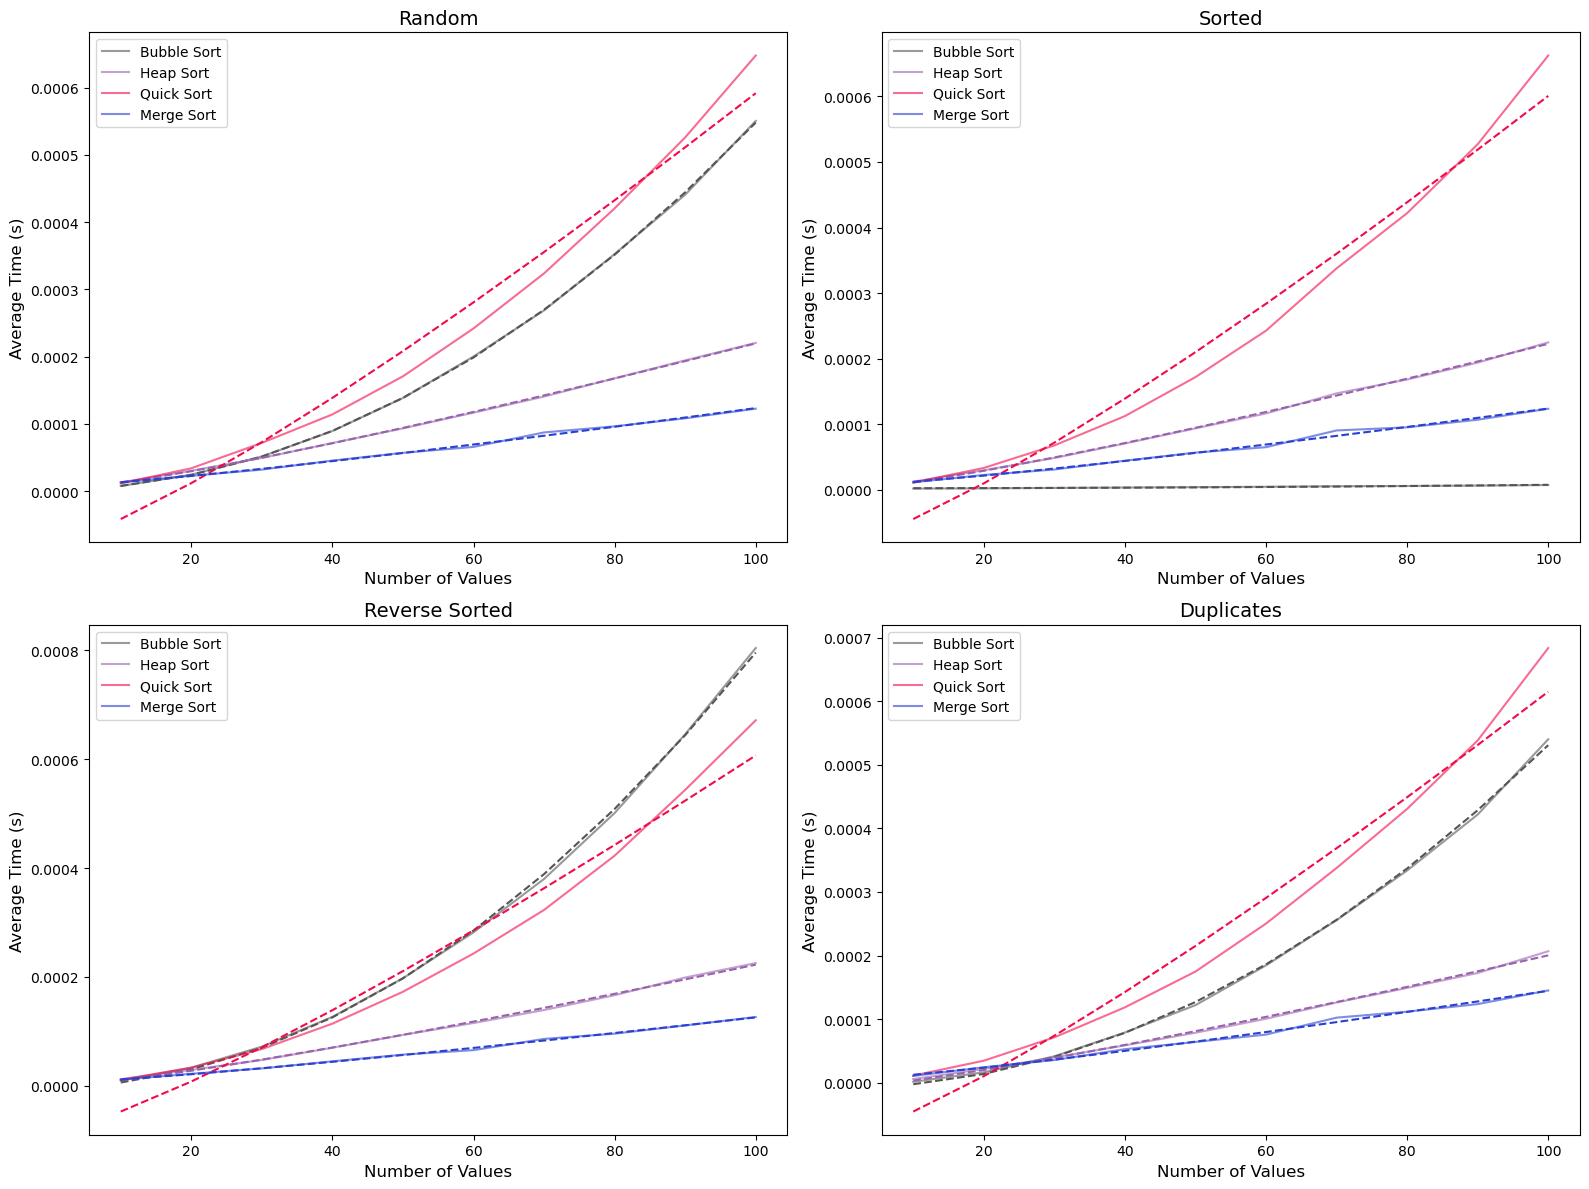

In [57]:
num_values = [int(x) for x in np.linspace(10, 100, num=10)] 
input_types = ['Random', 'Sorted', 'Reverse Sorted', 'Duplicates']
sort_times = {}

np.random.seed(42)

for input_type in input_types:
    sort_times[input_type] = {'Bubble Sort': [], 'Heap Sort': [], 'Quick Sort': [], 'Merge Sort': []}

    for n in num_values:
        bubble_sort_times = []
        heap_sort_times = []
        quick_sort_times = []
        merge_sort_times = []

        for i in range(100): 
            if input_type == 'Random':
                values = list(range(n))
                np.random.shuffle(values)
            elif input_type == 'Sorted':
                values = list(range(n))
            elif input_type == 'Reverse Sorted':
                values = list(range(n, 0, -1))
            elif input_type == 'Duplicates':
                values = [np.random.randint(0, n // 10) for _ in range(n)]

            bubble_sort_times.append(timeit.timeit(lambda: bubble_sort(values), number=1))
            heap_sort_times.append(timeit.timeit(lambda: heap_sort(values), number=1))
            quick_sort_times.append(timeit.timeit(lambda: quick_sort(values, 0, len(values) - 1), number=1))
            merge_sort_times.append(timeit.timeit(lambda: merge_sort_iterative(values), number=1))

        sort_times[input_type]['Bubble Sort'].append(np.mean(bubble_sort_times))
        sort_times[input_type]['Heap Sort'].append(np.mean(heap_sort_times))
        sort_times[input_type]['Quick Sort'].append(np.mean(quick_sort_times))
        sort_times[input_type]['Merge Sort'].append(np.mean(merge_sort_times))

plt.figure(figsize=(16, 12), dpi=100)

colors = ['#555555', '#9862AE', '#F30A49', '#2940D3']
plot_index = 1

for input_type in input_types:
    plt.subplot(2, 2, plot_index)
    
    for algorithm, color in zip(['Bubble Sort', 'Heap Sort', 'Quick Sort', 'Merge Sort'], colors):
        plt.plot(num_values, sort_times[input_type][algorithm], label=algorithm, color=color, alpha=0.6)

        X = np.array(num_values)
        y = np.array(sort_times[input_type][algorithm])
        
        if algorithm == 'Bubble Sort':
            X_transformed = X**2
        else:
            X_transformed = X * np.log(X)
        
        X_transformed = X_transformed.reshape(-1, 1)
        
        reg = LinearRegression().fit(X_transformed, y)
        y_pred = reg.predict(X_transformed)
        plt.plot(num_values, y_pred, linestyle='dashed', color=color, alpha=1)
    
    plt.xlabel('Number of Values', fontsize=12)
    plt.ylabel('Average Time (s)', fontsize=12)
    plt.title(input_type, fontsize=14)
    plt.legend(fontsize=10)
    plot_index += 1

plt.tight_layout()
plt.show()

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Findings</p>

After examining the visualisation, it becomes apparent that merge sort is the fastest overall. This outcome was surprising to me because I initially believed that quick sort might be the fastest algorithm, possibly influenced by its name.

Bubble sort seems to be significantly faster than the rest of the algorithms for sorted lists only, which is logical because, in the best case (an already sorted list), bubble sort takes only one pass through the list to confirm that it's sorted. In this scenario, its complexity is $\mathcal{O}(n)$. However, for other input types, bubble sort's performance deteriorates considerably due to its $\mathcal{O}(n^2)$ average and worst-case complexity.

The similar results for heap sort and merge sort can be attributed to their shared $\mathcal{O}(n \log{n})$ average-case time complexity. Nevertheless, based on the visualisation, merge sort seems to be the optimal choice in this experiment.

Regarding quick sort, I was curious about the reasons behind its slower performance compared to the other algorithms. I concluded that factors such as pivot selection, input sensitivity, dataset size, and in-place sorting (which was investigated earlier in our analysis of quick sort) can significantly impact its performance. In some cases, other algorithms like merge sort may outperform quick sort. However, under the right conditions and with proper optimisation, quick sort can remain a competitive choice.

Following the visualisation, I incorporated regression analysis to further examine the performance of each sorting algorithm. This analysis allowed me to compare the observed running times with the theoretical time complexities, providing a more robust understanding of the algorithms' performance. As we can see, the regression line closely follows the plotted line, indicating that the algorithms are indeed following their theoretical time complexities.

After reading <a href="#10">[10]</a>, I became optimistic about improving the quick sort algorithm. The paper builds upon previous research by using dynamic pivot selection methods and median selection pivot with bidirectional partitioning to develop a more efficient sorting algorithm that combines the best aspects of these approaches. With great enthusiasm, I decided to implement this optimised quick sort and visualise how much faster it is compared to the non-optimised version and other sorting algorithms.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Optimising Quick Sort</p>

After conducting external research on how to improve the performance of quick sort, I have finally concluded on the final optimised algorithm, which is provided below, coded in Python.

Differences between the original quick sort and the optimised version:

1. Using insertion sort for small subarrays (size smaller than the threshold) <a href="#10">[10]</a>. This is because insertion sort has lower overhead and performs better on smaller list, combining it with quick sort provides a more efficient hybrid sorting algorithm.


2. Utilising median-of-three pivot selection technique <a href="#10">[10]</a>, which reduces the likelihood of worst-case pivot choices. By choosing the median of the first, middle, and last elements of the subarray, the algorithm is more likely to select a pivot that evenly divides the subarray, therefore avoiding highly unbalanced partitions. From our previous findings, this is one of the reasons for the $\mathcal{O}(n^2)$ complexity times.


3. Using tail recursion elimination to reduce the depth of the recursion tree <a href="#11">[11]</a>. By sorting the smaller subarray first using recursion and updating the pointers to continue sorting the larger subarray in the while loop, the algorithm can minimise the maximum recursion depth, which in turn reduces memory usage and improves overall performance.

In [58]:
def optimised_quick_sort(lst, threshold=10):
    _optimised_quick_sort(lst, 0, len(lst) - 1, threshold)

# Optimised Quick Sort algorithm implementation
def _optimised_quick_sort(lst, p, r, threshold):
    # Use a while loop instead of recursion to reduce function call overhead
    while p < r:
        # If the subarray size is smaller than the threshold, use insertion sort
        # This optimisation improves performance on small subarrays
        if r - p + 1 < threshold:
            insertion_sort(lst, p, r)
            break

        # Use median-of-three pivot selection to reduce the likelihood of worst-case pivot choices
        pivot_index = median_of_three(lst, p, r)
        q = _partition(lst, p, r, pivot_index)

        # Tail recursion elimination: sort the smaller subarray first using recursion
        # Then update the pointers and continue sorting the larger subarray in the while loop
        if q - p < r - q:
            _optimised_quick_sort(lst, p, q - 1, threshold)
            p = q + 1
        else:
            _optimised_quick_sort(lst, q + 1, r, threshold)
            r = q - 1

# Median-of-three pivot selection function
def median_of_three(lst, p, r):
    mid = (p + r) // 2
    # Sort the first, middle, and last elements of the subarray
    if lst[p] > lst[mid]:
        lst[p], lst[mid] = lst[mid], lst[p]
    if lst[p] > lst[r]:
        lst[p], lst[r] = lst[r], lst[p]
    if lst[mid] > lst[r]:
        lst[mid], lst[r] = lst[r], lst[mid]
    # Move the median value (pivot) to the second-last position and return its index
    lst[mid], lst[r - 1] = lst[r - 1], lst[mid]
    return r - 1

# Partition function with the pivot index as an argument
def _partition(lst, p, r, pivot_index):
    # Move the pivot to the last position
    lst[pivot_index], lst[r] = lst[r], lst[pivot_index]
    i = p - 1
    # Partition the subarray around the pivot
    for j in range(p, r):
        if lst[j] <= lst[r]:
            i += 1
            lst[i], lst[j] = lst[j], lst[i]
    # Move the pivot to its final sorted position and return its index
    lst[i + 1], lst[r] = lst[r], lst[i + 1]
    return i + 1

# Insertion sort implementation for small subarrays
def insertion_sort(lst, p, r):
    for i in range(p + 1, r + 1):
        key = lst[i]
        j = i - 1
        while j >= p and lst[j] > key:
            lst[j + 1] = lst[j]
            j -= 1
        lst[j + 1] = key

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 0px solid #F6F1E9">Experiment 2</p>

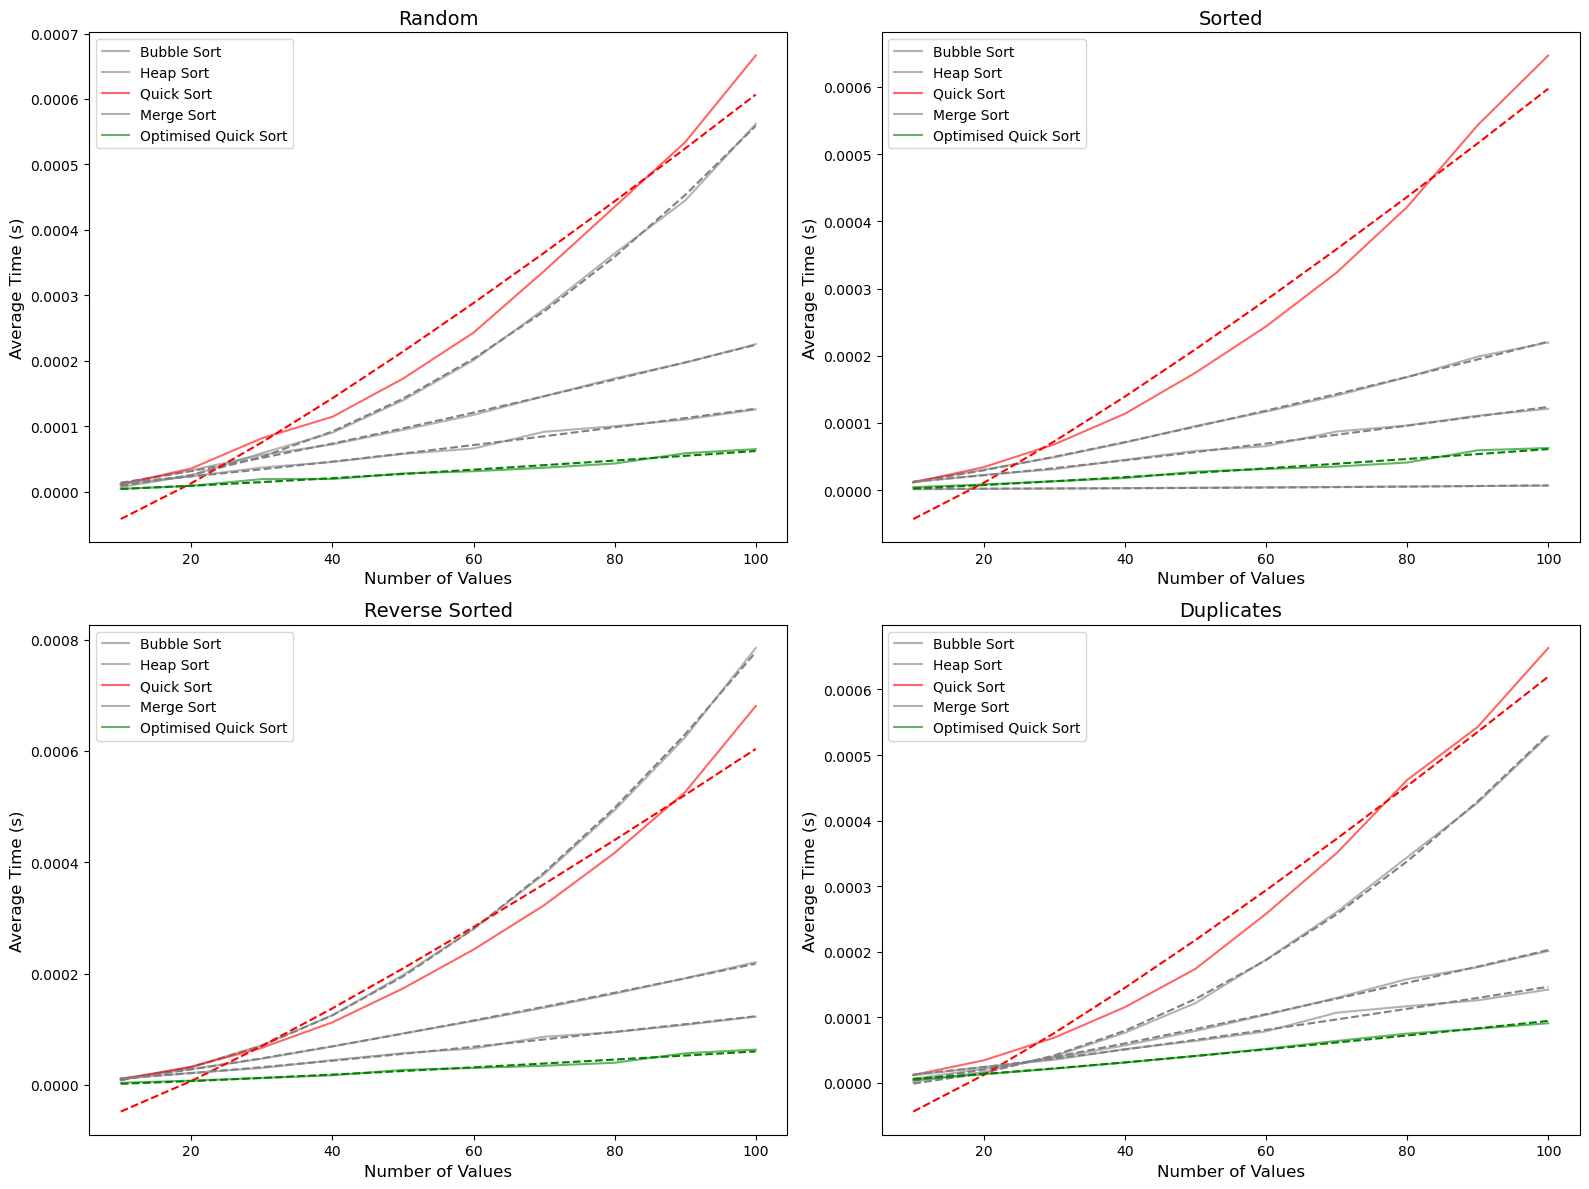

In [59]:
num_values = [int(x) for x in np.linspace(10, 100, num=10)] 
input_types = ['Random', 'Sorted', 'Reverse Sorted', 'Duplicates']

np.random.seed(42)

for input_type in input_types:
    sort_times[input_type] = {'Bubble Sort': [], 'Heap Sort': [], 'Quick Sort': [], 'Merge Sort': [], 'Optimised Quick Sort': []}

    for n in num_values:
        bubble_sort_times = []
        heap_sort_times = []
        quick_sort_times = []
        merge_sort_times = []
        opt_quick_sort_times = []

        for i in range(100): 
            if input_type == 'Random':
                values = list(range(n))
                np.random.shuffle(values)
            elif input_type == 'Sorted':
                values = list(range(n))
            elif input_type == 'Reverse Sorted':
                values = list(range(n, 0, -1))
            elif input_type == 'Duplicates':
                values = [np.random.randint(0, n // 10) for _ in range(n)]

            bubble_sort_times.append(timeit.timeit(lambda: bubble_sort(values), number=1))
            heap_sort_times.append(timeit.timeit(lambda: heap_sort(values), number=1))
            quick_sort_times.append(timeit.timeit(lambda: quick_sort(values, 0, len(values) - 1), number=1))
            merge_sort_times.append(timeit.timeit(lambda: merge_sort_iterative(values), number=1))
            opt_quick_sort_times.append(timeit.timeit(lambda: optimised_quick_sort(values), number=1))

        sort_times[input_type]['Bubble Sort'].append(np.mean(bubble_sort_times))
        sort_times[input_type]['Heap Sort'].append(np.mean(heap_sort_times))
        sort_times[input_type]['Quick Sort'].append(np.mean(quick_sort_times))
        sort_times[input_type]['Merge Sort'].append(np.mean(merge_sort_times))
        sort_times[input_type]['Optimised Quick Sort'].append(np.mean(opt_quick_sort_times))

plt.figure(figsize=(16, 12), dpi=100)
plot_index = 1

colors = ['grey', 'grey', 'red', 'grey','green']

for input_type in input_types:
    plt.subplot(2, 2, plot_index)
    
    for algorithm, color in zip(['Bubble Sort', 'Heap Sort', 'Quick Sort', 'Merge Sort','Optimised Quick Sort'], colors):
        plt.plot(num_values, sort_times[input_type][algorithm], label=algorithm, color=color, alpha=0.6)

        X = np.array(num_values)
        y = np.array(sort_times[input_type][algorithm])
        
        if algorithm == 'Bubble Sort':
            X_transformed = X**2
        else:
            X_transformed = X * np.log(X)
        
        X_transformed = X_transformed.reshape(-1, 1)
        
        reg = LinearRegression().fit(X_transformed, y)
        y_pred = reg.predict(X_transformed)
        plt.plot(num_values, y_pred, linestyle='dashed', color=color, alpha=1)
    
    plt.xlabel('Number of Values', fontsize=12)
    plt.ylabel('Average Time (s)', fontsize=12)
    plt.title(input_type, fontsize=14)
    plt.legend(fontsize=10)
    plot_index += 1

plt.tight_layout()
plt.show()

# <p id="finalconclusion" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">6 Final Conclusion </p>

Optimising quick sort has significantly improved the algorithm's performance. However, bubble sort remains the fastest algorithm for already sorted lists due to its best-case complexity of $\mathcal{O}(n)$. To further support our final conclusion, I have conducted a Mann-Whitney U test.

Before I provide the results of the Mann-Whitney U test, I want to quickly explain what the p-value means and especially what it means in this context. A p-value is a measure of the evidence against a null hypothesis. In our context, the null hypothesis would be that there is no significant difference in performance between the optimised quick sort and the other algorithms tested (bubble sort, heap sort, quick sort, and merge sort).

The lower p-values indicate stronger evidence against the null hypothesis, implying a significant difference in performance between the algorithms. I have chosen the threshold of (0.05) which means anything greater we do not reject the null hypothesis; however, anything lower, then we can reject the null hypothesis that the means are equal and conclude that the optimised quick sort is indeed the best choice overall.

In [60]:
compare_algorithms = ['Bubble Sort', 'Heap Sort', 'Quick Sort', 'Merge Sort']
input_types = ['Random', 'Sorted', 'Reverse Sorted', 'Duplicates']
p_values = {}

for input_type in input_types:
    p_values[input_type] = {}
    optimised_quick_sort_times = sort_times[input_type]['Optimised Quick Sort']
    for algo in compare_algorithms:
        other_algo_times = sort_times[input_type][algo]
        _, p_value = mannwhitneyu(optimised_quick_sort_times, other_algo_times)
        p_values[input_type][algo] = p_value

df_p_values = pd.DataFrame.from_dict(p_values)
df_p_values.index.name = 'Algorithm'
df_p_values.columns.name = 'Input Type'

df_p_values_styled = df_p_values.style.applymap(lambda x: 'background-color: #FF6969' if x > 0.05 else '')
df_p_values_styled

Input Type,Random,Sorted,Reverse Sorted,Duplicates
Algorithm,,,,
Bubble Sort,0.011330,0.000583,0.004586,0.075662
Heap Sort,0.007285,0.009108,0.009108,0.121225
Quick Sort,0.004586,0.004586,0.004586,0.017257
Merge Sort,0.031209,0.045155,0.037635,0.185877


Now, to conclude the results, I need to be cautious in stating that one algorithm is definitely faster than the other since several factors can affect the performance of algorithms, and these factors can vary from one situation to another. However, based on the research that has been conducted in this notebook and the expirement we can justify why optimised quick sort is a good final pick for the purpose of Task 6.3D. 

First of all, we know that upper bound time complexity of quick sort is $\mathcal{O}(n^2)$ in the worst case scenario, whereas the upper bound time complexity of heap sort and merge sort is $\mathcal{O}(n \log{n})$. However, in the case of optimised quick sort with the median-of-three pivot selection and insertion sort optimisation, the worst case time complexity is $\mathcal{O}(n \log{n})$. 

Secondly, it is worth noting that the lower bound for all three algorithms (optimised quick sort, merge sort, and heap sort) is also $\mathcal{O}(n \log{n})$. Remember that this represents an **asymptotic** lower limit on the time complexity, rather than a **precise** measurement. Therefore, during the experiment, regression analysis was used to verify whether the observed time complexity aligned with the theoretical time complexity, which it indeed did.

Thirdly, the Mann-Whitney U test was used to check if the results were due to chance or they were indeed significantly different. The reason of using this test in particular instead of the t-test is due to the fact that the distributions of the algorithm results were not normal.

Now, let's discuss why I believe optimised quick sort is the best algorithm to use for Task 6.3D. Keep in mind that the best-case time complexity for the three algorithms (optimised quick sort, merge sort, and heap sort) is $\mathcal{O}(n \log{n})$. However, this doesn't mean they all run at this speed; it just means they approach this limit but never surpass it. *Remember this point*. 

I performed an experiment with robust measures and timed each algorithm. Visually, we can see that optimised quick sort was definitely faster than the other algorithms in 3 out of 4 cases. Bubble sort was the fastest for the already sorted list, which we understand why. However, optimised quick sort was faster in 3 out of the 4 cases.

Recall the point I asked you to remember? We said that the best-case time complexity for the three algorithms (optimised quick sort, merge sort, and heap sort) is $\mathcal{O}(n \log{n})$, and that is true. This time complexity represents the fastest possible growth rate an algorithm can achieve under the most favorable conditions explained at the start of this notebook. 

To finalise the results, I conducted the Mann-Whitney U test, which revealed that the optimised quick sort was in fact statistically different from the other algorithms for random, sorted, and reverse sorted lists (remember bubble sort was the fastest for sorted list followed by optimised quick sort). However, in the case of lists with duplicates, there wasn't a significant statistical difference between the four algorithms. The purpose was not to find the fastest algorithm in general, as it is not appropriate to conclude that one is universally better than the other. Instead, we have enough evidence to make the statement that, in the case of Task 6.3D, choosing the optimised quick sort will be the most optimal choice based on our findings.

In conclusion, based on our experiment, we can infer that the optimised quick sort exhibited better performance in most cases, likely approaching its best-case time complexity more closely than the other algorithms. This makes it a suitable choice for Task 6.3D, considering the specific requirements and conditions of that task.

# <p id="summary" style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#2C3333; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #F6F1E9">7 References</p>

<p id="1">[1] T. H. Cormen, C. E. Leiserson, R. L. Rivest, and C. Stein, Introduction to Algorithms, MIT Press, (2009). 150 - 168</p>

<p id="2">[2] Thareja, Reema, Data Structures Using C (2nd Edition) - 12.3.2.7 Decreasing the Value of a Node, Oxford University Press, (2014). 361 - 378</p>

<p id="3">[3] Abdul Bari. Data Structures & Algorithms in C++ : Concepts, Problems, Analysis. Udemy. (2018) section 19: Heap</p>

<p id="4">[4] OLAGUNJU, A. O. Journal of the Elisha Mitchell Scientific Society, 115(2), 82-90</p>

<p id="5">[5] Guttag, J.V. (2016). Introduction to Computation and Programming Using Python with Application to Understanding Data (2nd ed.). The MIT Press.</p>

<p id="6">[6] "Average-case complexity" Wikipedia. <a href="https://en.wikipedia.org/wiki/Average-case_complexity">[Online]</a>.</p>

<p id="7">[7] "Worst-case complexity" Wikipedia. <a href="https://en.wikipedia.org/wiki/Worst-case_complexity">[Online]</a>.</p>

<p id="8">[8] "Heapsort" Wikipedia. <a href="https://en.wikipedia.org/wiki/Heapsort">[Online]</a>.</p>

<p id="9">[9] "Python range() Function", W3Schools. <a href="https://www.w3schools.com/python/ref_func_range.asp">[Online]</a>.</p>

<p id="10">[10] "Optimizing Complexity of Quick Sort", Md. Sabir Hossain, Snaholata Mondal, Rahma Simin Ali & Mohammad Hasan. <a href="https://link.springer.com/chapter/10.1007/978-981-15-6648-6_26">[Online]</a>.</p>

<p id="11">[11] "Advanced Quick Sort (Hybrid Algorithm)", GeeksForGeeks. <a href="https://www.geeksforgeeks.org/advanced-quick-sort-hybrid-algorithm/">[Online]</a>.</p>

<p id="12">[12] "Quick Sort Optimization", Medium. <a href="https://medium.com/@hamzamirza347/quick-sort-optimization-6784c43935bd#:~:text=To%20optimize%20quick%20sort%20to,)%20from%20O(n)">[Online]</a>.</p>

<p id="13">[13] "Best, worst and average case" Wikipedia. <a href="https://en.wikipedia.org/wiki/Best,_worst_and_average_case">[Online]</a>.</p>